# Logistic Regression of Cinephobe Movie Picks

In [32]:
# install packages
%pip install scikit-learn
%pip install seaborn
%pip install matplotlib




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
# Lets start by importing the necessary packages
import itertools
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import RFE
import seaborn as sns
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np

In [34]:
# import csv files

def load_data(file_path):
    return pd.read_csv(file_path)

csv_file_path = 'data_raw.csv'
rp = 'repeat_off.csv'

In [35]:
import numpy as np

keep = ["Zach", "Amin", "Mayes", 'Movie','Year', 'Time', 'Genre', 'Pick', 'RT Crit', 'RT Aud', 'Aud #', 'Combo', 'Budget', 'Box Off WW', 'Cost']

target = ["Zach", "Amin", "Mayes"]

float_cols = ['Year', 'Time', 'Pick', 'RT Aud', 'Aud #', 'Combo', 'Budget', 'Box Off WW', 'Cost', 'Pick_0','Pick_1','Pick_2', 'Pick_3']

cols_to_drop = ["Genre",]

pick_value_map = {
    'A': 0,
    'Z': 1,
    'M': 2
}

rows_to_drop = ['2020', '2021', '2022', '2023', '2024', '2025']

CATEGORY_MAPPING = {
    'Action': ['action', 'adventure', 'thriller', 'war', 'fight', 'explosion'],
    'Comedy': ['comedy', 'sitcom', 'stand-up', 'parody', 'humor', 'funny'],
    'Drama': ['drama', 'romance', 'documentary', 'biography', 'tragic', 'serious'],
    'Horror': ['horror', 'thriller', 'slasher', 'supernatural', 'psychological', 'ghost'],
    'Romance': ['romance', 'love', 'relationship', 'dating', 'romantic', 'affair'],
    'Sci-Fi': ['science fiction', 'sci-fi', 'space', 'alien', 'future', 'robot', 'cyberpunk'],
    'Animation': ['animation', 'cartoon', 'anime', '3d', 'animated', 'kids'],
    'Thriller': ['thriller', 'suspense', 'mystery', 'crime', 'spy', 'detective'],
    'Martial Arts': ['martial arts', 'kung fu', 'karate', 'taekwondo', 'judo', 'capoeira', 'kickboxing'],
    'Superhero': ['superhero', 'hero', 'comic book', 'marvel', 'dc', 'batman', 'spider-man', 'avengers'],
    'Sports': ['sports', 'football', 'basketball', 'baseball', 'soccer', 'tennis', 'hockey', 'race'],
    'Musical': ['musical', 'song', 'dance', 'musicals', 'performer', 'theatre', 'broadway'],
    'Western': ['western', 'cowboy', 'sheriff', 'outlaw', 'wild west', 'spaghetti western', 'rodeo'],
}

cat_list = keys_list = list(CATEGORY_MAPPING.keys())

cat_features = ['Pick']
numeric_features = ["Time", "RT Crit", "RT Aud", 'Aud #', 'Combo', 'Budget', 'Box Off WW',]
bin_features = [x for x in cat_list]
bin1_features = ['Cost','Pick_0','Pick_1','Pick_2','Pick_3']


model_features = ["RT Aud", 'Box Off WW', 'Cost', 'Pick_0','Pick_1','Pick_2','Pick_3']
actors = ['Nicolas Cage', 'Downtown LA Bridge', 'Sylvester Stallone']

all_vars = ['Pick_0','Pick_1','Pick_2','Comedy']
all_vars = all_vars + numeric_features + actors

csv_file_path = 'data_raw.csv'

name_to_tuple = {
    "Zach": ('y0_test', 'y0_train'),
    "Amin": ('y1_test', 'y1_train'),
    "Mayes": ('y2_test', 'y2_train')
}

z_f = ["RT Crit", 'Box Off WW']
a_f = ["Pick_2", 'Time', "RT Crit", "Nicolas Cage", 'Downtown LA Bridge']
m_f = ["Pick_1", "Comedy", 'Combo', 'Budget', "Downtown LA Bridge"]

best = {
    "Zach": z_f,
    "Amin": a_f,
    "Mayes": m_f
}

dt_params = {
    "Zach": {
        'criterion': 'gini',
        'max_depth': np.int64(9),
        'max_features': np.int64(1),
        'min_samples_leaf': np.int64(1),
        'min_samples_split': np.int64(8),
    },
    "Amin": {
        'criterion': 'gini',
        'max_depth': np.int64(5),
        'max_features': np.int64(7),
        'min_samples_leaf': np.int64(2),
        'min_samples_split': np.int64(18),
    },
    "Mayes": {
        'criterion': 'gini',
        'max_depth': np.int64(6),
        'max_features': np.int64(7),
        'min_samples_leaf': np.int64(3),
        'min_samples_split': np.int64(19),
    }
}


svc_params = {
    "Zach": {
        "C": 1,
        "gamma": 'scale',
        'kernel': 'linear'
    },
    "Amin": {
        "C": 0.1,
        "gamma": 'scale',
        'kernel': 'linear'
    },
    "Mayes": {
        "C": 0.1,
        "gamma": 'scale',
        'kernel': 'linear'
    },
}

best_log_reg_features = {
    "Zach": ['Pick_0','Comedy', 'RT Crit', 'RT Aud', 'Aud #', 'Box Off WW'],
    "Amin": ['Pick_2', 'Time', 'RT Crit', 'RT Aud', 'Box Off WW', 'Nicolas Cage', 'Sylvester Stallone'],
    "Mayes": ['Pick_2', 'Time', 'Combo', 'Downtown LA Bridge', 'Sylvester Stallone']
}

First we will groom the data.
The data is stored in a local CSV file.

There are floats that are represented as percentages, and large integers that are represented as multiples of either 1,000 or 1,000,000. We need to make these consistent and readable by our model.

There are also Binary features that are not expressed as 0 or 1. For example, the cost variable is either a $ or null. we need to conver these to be either 0 or 1.

There is also a categorical variable, 'pick' which is currently expressed as one of four string options. We are going to convert that into four different binary variables, whereas each option in the categorical variable, is now it's own 'yes or no' binary variable.

We also have the issue of genre. In our raw data set, genre is expressed as a collection of strings. We are going to use a mapping object to categorize these genre options into a few different buckets of genre. For example, 'thriller', 'suspense', 'mystery', 'crime', 'spy', 'detective' will all return a match for Thriller. Each bucket will be a binary variable. Movies can have more than one genre. For example, the movie Deadpool would likely return matches for Superhero, Action, and Comedy.

Also included is a CSV of actor data. The data is shaped as a CSV as well, where in each row of actors there is a list of movies that that actor appears in. I have groomed and appended this data to my original dataset. However, at this time we are only including the 10 most common actors into our model. 

In [36]:
# helper functions for data grooming

def extract_num_reviews(x):
    s = str(x).replace('+', '').replace('<', '').replace('V', '').strip()
    if s == "nan":
        return 'nan'
    if 'k' or 'K' in s:
        return float(s.replace('k','').replace('K', '')) * 1000
    else:
        print(s)
        return int(s)
    

def extract_mil_value(x):
    # Check if the value is a valid float or can be converted to a float
    s = str(x)
    if not any(char.isnumeric() for char in s):
        return 'nan'
    if '-' in x:
        return 'nan'
    if '?' in x:
        return 'nan'
    if '/' in x:
        return 'nan'
    if ',' in x:
        return 'nan'
    if ' ' not in x:
        return 'nan'
    v = s.replace('$', '').replace(' Mil', '').replace('+', '')
    return float(v) * 1000000


def map_cost_values(x):
    if x == '$':
        return 1
    else:
        return 0

def map_pick_values(x):
    if x == 'A':
        return 0
    elif x == 'Z':
        return 1
    elif x == 'M':
        return 2
    else:
        return 3

def map_percents(x):
    s = str(x)
    if '--' in s:
        return 'nan'
    if '%' in s:
        return int(s.replace('%', '').replace('.00',''))
    if isinstance(x, str):
        return x

def categorize_genres_for_row(g):
    """
    Categorize a genre string into binary categories based on predefined keywords.
    Each category gets a 1 if the genre matches, 0 otherwise.
    """
    # Split the genre string into a list (if it's a comma-separated string)
    row_genres = g.lower()
    
    # Prepare a binary dictionary for each category
    category_results = {category: 0 for category in CATEGORY_MAPPING}
    
    # Check each category for keywords in the genres
    for category, keywords in CATEGORY_MAPPING.items():
        if any(keyword in row_genres for keyword in keywords):
            category_results[category] = 1
    
    return category_results

def add_category_columns(df, genre_column):
    """
    Add binary category columns to the DataFrame based on the genre column.
    """
    # Apply the categorization function to each row in the genre column
    categories = df[genre_column].apply(lambda x: categorize_genres_for_row(x))

    # Convert the results into separate columns
    category_df = pd.DataFrame(categories.tolist(), columns=CATEGORY_MAPPING.keys())
    
    # Concatenate the original dataframe with the new category columns
    df = pd.concat([df, category_df], axis=1)
    
    return df

This script appies the above defined helper funtions to various slices of data. 

In [37]:
#  data grooming function
def groom_data(df_raw):
    df = df_raw[keep]
    df = df[~df['Movie'].isin(rows_to_drop) & df['Movie'].notna()]

    df['Cost'] = df['Cost'].apply(map_cost_values)

    # this will convert the string of who picked the movie, to a numerical catgorical feature
    df['Pick'] = df['Pick'].apply(map_pick_values)

    df_encoded = pd.get_dummies(df['Pick'], prefix="Pick", drop_first=False)
    df_encoded = df_encoded.astype(int)

    df = pd.concat([df, df_encoded], axis=1)

    # these groom the dollar amounts and turn them into float values
    df['Budget'] = df['Budget'].apply(extract_mil_value)
    df['Box Off WW'] = df['Box Off WW'].apply(extract_mil_value)


    df['RT Crit'] = df["RT Crit"].apply(map_percents)
    df['RT Aud'] = df["RT Aud"].apply(map_percents)

    df['Combo'] = df["Combo"].apply(map_percents)

    df['Aud #'] = df['Aud #'].apply(extract_num_reviews)

    # remove unnamed rows from csv. 
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

    df = add_category_columns(df, 'Genre')

    df = df.drop(columns=cols_to_drop)
    df = df.iloc[:-6]
    for col in float_cols:
        df[col] = df[col].apply(lambda x: x if isinstance(x, float or int) else 0)
    df_clean = df.dropna()
    

    return df_clean

I took an object oriented approach to creating and maintaining the data. We have three different labels we are trying to predict. So we will have three different models. However we will want to re-use the data across each instance of each model. 

This class will hold our cleaned and split data. 

After splitting the data, because we have a set of very large integers, we are going to apply a Standard Scaler from sklearn onto our numerical features.

In [38]:
# run Data class, to store our models data

class Data:
    def __init__(self,raw_data, actor_raw_data):
        self.raw_data = raw_data
        self.a_r_data= actor_raw_data
        self.data = self.groom_model_data(raw_data)
        self.options = self.make_feature_options()
        self.a_data = self.groom_actor_data(actor_raw_data)

    def groom_actor_data(self, ad):
        l = ["Cast / Crew", "Appearances"]
        d = ad[l][:10]
        return d
    
    def make_json(self):
        records = self.data.to_json(orient='records' ,date_format='iso')
        parsed = json.loads(records)
        self.json = parsed

    def test_movies_json(self):
        records = self.X_test.to_json(orient='records' ,date_format='iso')
        parsed = json.loads(records)
        self.test_movies = parsed

    def add_actors(self):

        m = self.data
        for _, actor_row in self.a_data.iterrows():
            actor_name = actor_row["Cast / Crew"]
            actor_movies = actor_row['Appearances']
            
            # Add a binary column for each actor in the 'movies' DataFrame
            m[actor_name] = m['Movie'].apply(lambda movie: 1 if movie in actor_movies else 0)
        m = m.drop(columns="Movie")
        self.data = m

    def groom_model_data(self, raw_data):
        data = groom_data(raw_data)
        return data

    def split_data(self):
        df = self.data
        y0 = df[target[0]]
        y1 = df[target[1]]
        y2 = df[target[2]]
        X = df.drop(target, axis=1)
        X_train, X_test, y0_train, y0_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y0, y1, y2, test_size=0.20, random_state=42)
        print('done')

        scaler = StandardScaler()

        X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
        X_test[numeric_features] = scaler.fit_transform(X_test[numeric_features])

        self.X_test=X_test
        self.X_train=X_train
        self.y0_train=y0_train
        self.y1_train=y1_train
        self.y2_train=y2_train
        self.y0_test=y0_test
        self.y1_test=y1_test
        self.y2_test=y2_test
        self.scaler = scaler

    def make_feature_options(self):
        all_combinations = []
        
        # Generate combinations for all possible lengths (from 1 to len(arr))
        for r in range(1, len(all_vars) + 1):
            # itertools.combinations generates combinations of length r
            combinations = itertools.combinations(all_vars, r)
            all_combinations.extend(combinations)
        
        return [list(t) for t in all_combinations]

Lets pull the data in from the csv files, and create our Data class. 

In [39]:
# pull data from csv files

rd = load_data(csv_file_path)
rd1 = load_data(rp)

# now we initialize the Data class
D = Data(rd, rd1)
D.add_actors()

# print(D.data.head())
D.split_data()

D.make_feature_options()

done


[['Pick_0'],
 ['Pick_1'],
 ['Pick_2'],
 ['Comedy'],
 ['Time'],
 ['RT Crit'],
 ['RT Aud'],
 ['Aud #'],
 ['Combo'],
 ['Budget'],
 ['Box Off WW'],
 ['Nicolas Cage'],
 ['Downtown LA Bridge'],
 ['Sylvester Stallone'],
 ['Pick_0', 'Pick_1'],
 ['Pick_0', 'Pick_2'],
 ['Pick_0', 'Comedy'],
 ['Pick_0', 'Time'],
 ['Pick_0', 'RT Crit'],
 ['Pick_0', 'RT Aud'],
 ['Pick_0', 'Aud #'],
 ['Pick_0', 'Combo'],
 ['Pick_0', 'Budget'],
 ['Pick_0', 'Box Off WW'],
 ['Pick_0', 'Nicolas Cage'],
 ['Pick_0', 'Downtown LA Bridge'],
 ['Pick_0', 'Sylvester Stallone'],
 ['Pick_1', 'Pick_2'],
 ['Pick_1', 'Comedy'],
 ['Pick_1', 'Time'],
 ['Pick_1', 'RT Crit'],
 ['Pick_1', 'RT Aud'],
 ['Pick_1', 'Aud #'],
 ['Pick_1', 'Combo'],
 ['Pick_1', 'Budget'],
 ['Pick_1', 'Box Off WW'],
 ['Pick_1', 'Nicolas Cage'],
 ['Pick_1', 'Downtown LA Bridge'],
 ['Pick_1', 'Sylvester Stallone'],
 ['Pick_2', 'Comedy'],
 ['Pick_2', 'Time'],
 ['Pick_2', 'RT Crit'],
 ['Pick_2', 'RT Aud'],
 ['Pick_2', 'Aud #'],
 ['Pick_2', 'Combo'],
 ['Pick_2', 'Bu

These are helper functions that we will include in our model to create charts.

This is seperated just to keep the code a bit cleaner. 

In [40]:
# charing helpers for Model class

def count_plot(data, target):
    sns.countplot(x=target, data=data)
    plt.title('Target Variable Distribution')
    plt.show()

    # Get the count of each label (0 vs 1)
    target_counts = data[target].value_counts()
    print(target_counts)

def make_histogram(data, target):
    for column in numeric_features:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[data[target] == "Phobe"][column], color='blue', kde=True, label='Phobe')
        sns.histplot(data[data[target] == "Phile"][column], color='red', kde=True, label='Phile')
        plt.legend()
        plt.title(f'Distribution of {column} by Target Variable')
        plt.show()

def make_box_plots(data, target):
    for column in numeric_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target, y=column, data=data)
        plt.title(f'{column} by Target Variable')
        plt.show()

def make_count_plots(data, target):
    for column in bin_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue=target, data=data)
        plt.title(f'{column} by Target Variable')
        plt.show()

        # Calculate the count for each binary variable grouped by target variable
        print(data.groupby(target)[column].value_counts())

def make_heat_map(data, target):
    corr_matrix = data[numeric_features].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features')
    plt.show()

def get_bin_mean(data, target):
    for column in bin_features:
        print(data.groupby(column)[target].mean())

We will also use an object oriented approach for the creation of models. This will allow us to easily organize our code. We can also easily track relevant data such as accuracy scores, and our confusion matrices.

Within this class, we have also defined the functions taht we will use to create our models. Because of the object oriented apporach, we can easily create models and compare them. 

I have already run some gridCV optimizations and have taken the identified best parameters down as constants. I have included the code for the GridCV searches below, but the actual Model class will use the hardcoded parameters in the interest of having a user friendly run-time for the purposes of grading etc. 

In [41]:
#  The class for the model

class Model:
    def __init__(self, data, target):
        self.data= data
        self.target = target
        self.X_test=data.X_test
        self.X_train=data.X_train
        self.y_train=getattr(data, name_to_tuple[target][1])
        self.y_test=getattr(data, name_to_tuple[target][0])
        self.scaler=getattr(data, 'scaler')
        self.best_log_reg_features=best_log_reg_features[target]
        self.k_best_results = []


    def groom_model_data(self, raw_data):
        data = groom_data(raw_data)
        return data

    def describe_data(self):
        print(self.data.describe)

    def get_distribution(self):
        self.distribution = count_plot(self.data.data, self.target)

    def make_histograms(self):
        h = make_histogram(self.data.data, self.target)
        self.histograms = h

    def make_box_plot(self):
        bp = make_box_plots(self.data.data, self.target)

        self.bp = bp

    def count_plots(self):
        make_count_plots(self.data.data, self.target)

    def heat_map(self):
        m = make_heat_map(self.data.data, self.target)
        self.corr_matrix = m

    
    def bin_mean(self):
        make_heat_map(self.data, self.target)

    def decision_tree(self):
        pg = dt_params[self.target]
        dt = DecisionTreeClassifier(criterion=pg['criterion'], max_depth=pg['max_depth'], max_features=pg['max_features'], min_samples_leaf=pg['min_samples_leaf'], min_samples_split=pg['min_samples_split'])
        dt.fit(self.X_train, self.y_train)

        y_pred = dt.predict(self.X_test)

        # Evaluate the model's accuracy on the test set
        test_accuracy = accuracy_score(self.y_test, y_pred)
        print(f"Test Accuracy of Best DecisionTreeClassifier: {test_accuracy}")

        self.opt_dt_score = test_accuracy

        confusion_matr = confusion_matrix(self.y_test, y_pred)

        self.dt_results = {
            'accuracy': test_accuracy,
            'confusion_matrix': confusion_matr.tolist(),
            'y_pred': y_pred.tolist()
        }

    def make_log_reg(self):
        model = LogisticRegression(solver="liblinear")

        model.fit(self.X_train[self.best_log_reg_features], self.y_train)

        y_pred = model.predict(self.X_test[self.best_log_reg_features])

        accuracy = accuracy_score(self.y_test, y_pred)
        conf_matrix = confusion_matrix(self.y_test, y_pred)
        self.score = accuracy
        self.log_reg_results = {
            'accuracy': accuracy,
            'confusion_matrix': conf_matrix.tolist(),
            'y_pred': y_pred.tolist()
        }
    
    def make_prediction(self, args):
        print(args)

        scaler = self.scaler
        df = pd.DataFrame([args], columns=all_vars)
        
        df = df.where(pd.notnull(df), np.nan)
        df.fillna(0, inplace=True)
        print(df) 
        print(self.X_train)
        df[numeric_features] = scaler.fit_transform(df[numeric_features])
        model = LogisticRegression(solver="liblinear")
        model.fit(self.X_train[self.best_log_reg_features], self.y_train)

        y_pred = model.predict(df[self.best_log_reg_features])
        self.movie_prediction = y_pred.tolist()


    def random_forrest(self):
        i = 2
        scores = []
        while i < 20:

            rf = RandomForestClassifier(n_estimators=100)
            rf.fit(self.X_train, self.y_train)

            importances = rf.feature_importances_

            indices = np.argsort(importances)[::-1]

            top_features = self.X_train.columns[indices[:i]]
            X_selected = self.X_train[top_features]
            logreg = LogisticRegression(solver="liblinear", max_iter=200)
            logreg.fit(X_selected, self.y_train)

            X_test_selected = self.X_test[top_features]

            y_pred = logreg.predict(X_test_selected)
            accuracy = accuracy_score(self.y_test, y_pred)
            scores.append((i,accuracy))
            i += 1
        self.rf_scores = scores

        print(accuracy)

    def ada_boost(self):
        base_learner = DecisionTreeClassifier(max_depth=7)

        ada_boost = AdaBoostClassifier(estimator=base_learner, n_estimators=100, random_state=42)
        ada_boost.fit(self.X_train, self.y_train)

        y_pred = ada_boost.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, y_pred)
        self.ada_boost_score = accuracy
        confusion_matr = confusion_matrix(self.y_test, y_pred)

        self.ada_boost_results = {
            'accuracy': accuracy,
            'confusion_matrix': confusion_matr.tolist(),
            'y_pred': y_pred.tolist()
        }

    def get_kbest(self):
        best = 0
        i = 2
        while i < 20:
            log_reg = LogisticRegression(max_iter=200)
            selector = SelectKBest(k=i)
            X_selected = selector.fit_transform(self.X_train, self.y_train)
            log_reg.fit(X_selected, self.y_train)

            X_test_selected = selector.transform(self.X_test)

            y_pred = log_reg.predict(X_test_selected)

            accuracy = accuracy_score(self.y_test, y_pred)
            selected_indices = selector.get_support(indices=True)

            selected_features = self.X_test.columns
            selected_feature_names = [selected_features[i] for i in selected_indices]
            if accuracy > best:
                best = accuracy
                self.k_best_score = accuracy
                self.k_best_features = selected_feature_names
                self.k_best_y_pred = y_pred.tolist(),

            confusion_matr = confusion_matrix(self.y_test, y_pred)

            self.k_best_results.append({
                'accuracy': accuracy,
                'y_pred': y_pred.tolist(),
                'confusion_matrix': confusion_matr.tolist(),
                'num_features': i
            })
            i += 1


    def find_best_log_reg(self):
        best = 0
        best_f = []
        for o_i in self.data.options:
            o = o_i
            model = LogisticRegression(solver="liblinear")
            model.fit(self.X_train[o], self.y_train)

            y_pred = model.predict(self.X_test[o])

            accuracy = accuracy_score(self.y_test, y_pred)
            if accuracy > best:
                best = accuracy
                best_f = o
        self.best = best
        self.best_f = best_f
        self.X_test = self.X_test[best_f]
        self.X_train = self.X_train[best_f]

    def get_rfe(self):
        best= 0
        i = 2
        scores = []
        while i < 20:
            log_reg = LogisticRegression()
            selector = RFE(log_reg, n_features_to_select=i)
            X_selected = selector.fit_transform(self.X_train, self.y_train)

            log_reg.fit(X_selected, self.y_train)

            X_test_selected = selector.transform(self.X_test)

            y_pred = log_reg.predict(X_test_selected)
            accuracy = accuracy_score(self.y_test, y_pred)
            confusion_matr = confusion_matrix(self.y_test, y_pred)

            selected_indices = selector.get_support(indices=True)

            selected_features = self.X_test.columns
            selected_feature_names = [selected_features[i] for i in selected_indices]

            if accuracy > best:
                best = accuracy
                self.rfe_score = accuracy
                self.rfe_best_features = selected_feature_names
                self.rfe_best_y_pred = y_pred.tolist()
            scores.append({
                'num_features': i,
                'accuracy': accuracy,
                'confusion_matrix': confusion_matr.tolist(),
                'y_pred': y_pred.tolist()
            })
            i += 1
        self.rfe_scores = scores
    
    def random_forrest(self):
        best = 0
        i = 2
        scores = []
        while i < 20:

            rf = RandomForestClassifier(n_estimators=1000)
            rf.fit(self.X_train, self.y_train)

            importances = rf.feature_importances_

            indices = np.argsort(importances)[::-1]

            top_features = self.X_train.columns[indices[:i]]
            X_selected = self.X_train[top_features]
            logreg = LogisticRegression(solver="liblinear", max_iter=200)
            logreg.fit(X_selected, self.y_train)

            X_test_selected = self.X_test[top_features]

            y_pred = logreg.predict(X_test_selected)
            accuracy = accuracy_score(self.y_test, y_pred)

            confusion_matr = confusion_matrix(self.y_test, y_pred)

            if accuracy > best:
                best = accuracy
                self.rf_score = accuracy
                self.rf_best_features = top_features.tolist()
                self.rf_best_y_pred = y_pred.tolist(),

            scores.append({
                'num_features': i,
                'accuracy': accuracy,
                'y_pred': y_pred.tolist(),
                'best_features': top_features.tolist(),
                'confustion_matrix': confusion_matr.tolist()
            })
            i += 1
        self.rf_scores = scores
    
    def svc(self):
        pg = svc_params[self.target]
        svc_model = SVC(C=pg['C'], gamma=pg['gamma'], kernel=pg['kernel'])
        svc_model.fit(self.X_train, self.y_train)

        y_pred = svc_model.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, y_pred)
        print(f"Optimized Accuracy: {accuracy * 100:.2f}%")
        confusion_matr = confusion_matrix(self.y_test, y_pred)
        print(confusion_matr)
        self.svc_score = accuracy

        self.svc_results = {
            'accuracy': accuracy,
            'confusion_matrix': confusion_matr.tolist(),
            'y_pred': y_pred.tolist()
        }

    def poly_preprocess(self):
        poly = PolynomialFeatures(degree=2)

        # Transform the training and test sets to include polynomial features
        X_train_poly = poly.fit_transform(self.X_train)
        X_test_poly = poly.transform(self.X_test)

        # Initialize the Logistic Regression model
        logreg = LogisticRegression(max_iter=200)

        # Train the Logistic Regression model on the polynomial features
        logreg.fit(X_train_poly, self.y_train)

        # Make predictions on the test set
        y_pred = logreg.predict(X_test_poly)

        # Evaluate the model's accuracy
        accuracy = accuracy_score(self.y_test, y_pred)
        self.poly_score = accuracy

        confusion_matr = confusion_matrix(self.y_test, y_pred)

        self.ply_results = {
            'accuracy': accuracy,
            'confusion_matrix': confusion_matr.tolist(),
            'y_pred': y_pred.tolist()
        }

    def combined_model(self):
        lists = [
            self.ada_boost_results['y_pred'],
            self.dt_results['y_pred'],
            self.log_reg_results['y_pred'],
            self.svc_results["y_pred"],
            self.ply_results["y_pred"],
            getattr(self, 'rf_best_y_pred'),
            getattr(self, 'rfe_best_y_pred'),
            getattr(self, 'k_best_y_pred'),
        ]
        zipped = zip(*lists)

        aggregated = [Counter(group).most_common(1)[0][0] for group in zipped]
        accuracy = accuracy_score(self.y_test, aggregated)

        self.combined_accuracy = accuracy


In [42]:
# create a model for each judge
M = Model(D, 'Zach')
M1 = Model(D, 'Amin')
M2 = Model(D, 'Mayes')

Below we have the code to create graphs to explore the data.

We have the same charts available for each judge. 

There appears to be minimal correlation between the numeric variables, with a couple exceptions. Budget and Gross are correlated, as are Combo and the invidual scores that comprise combination. Both of these are logical.

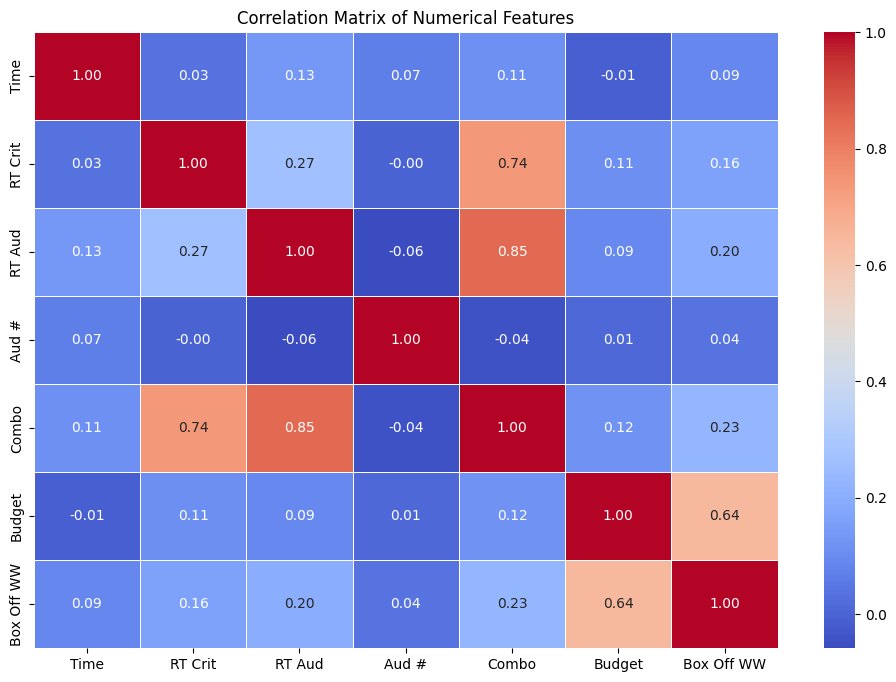

In [43]:
M.heat_map()

We can also explore the features individually.
We have methods for box plots, histograms, and and count plots.

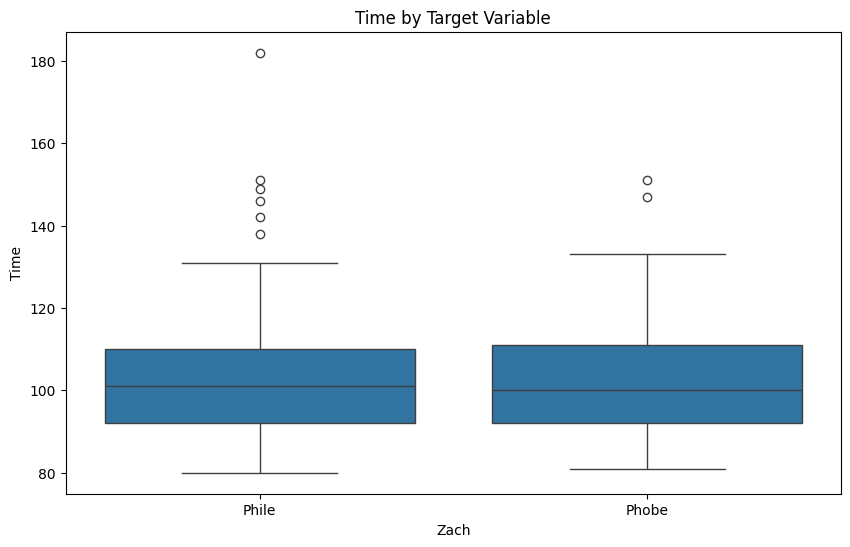

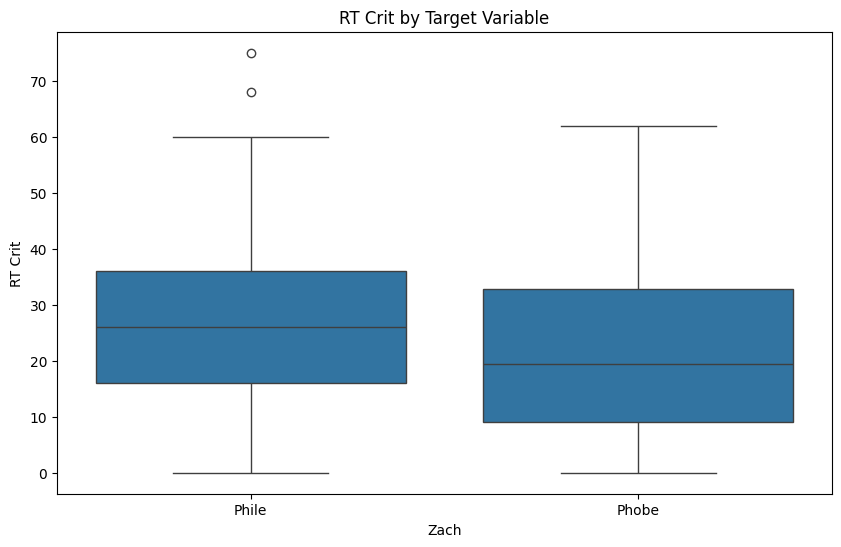

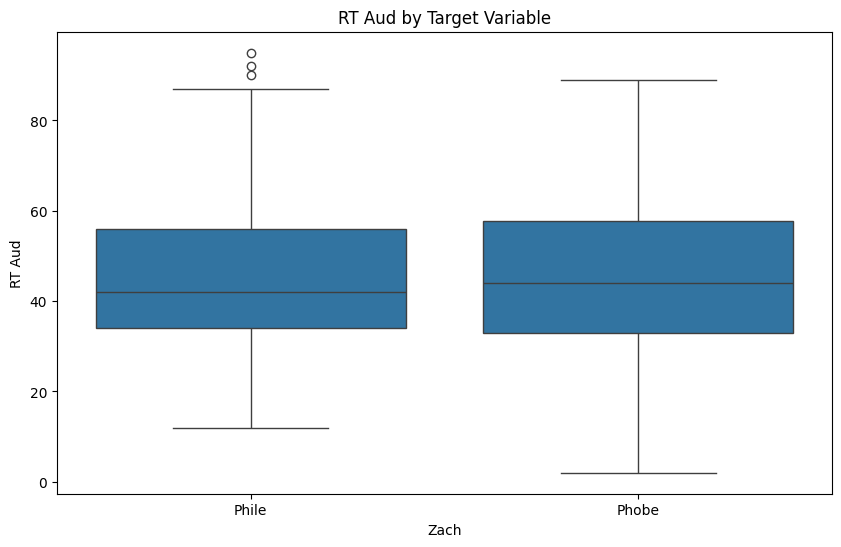

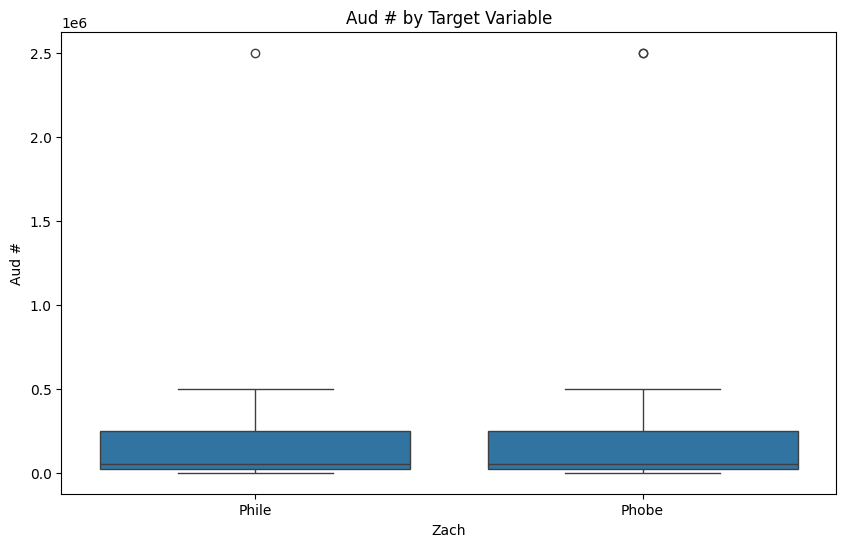

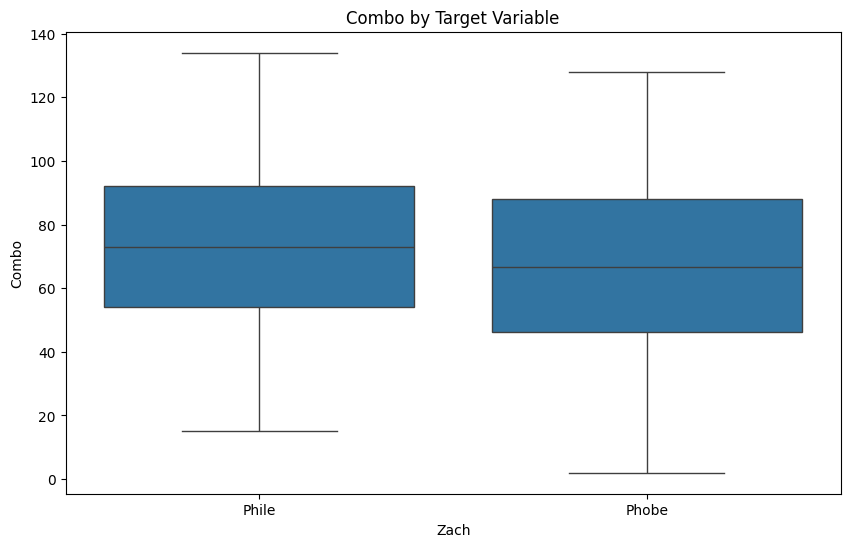

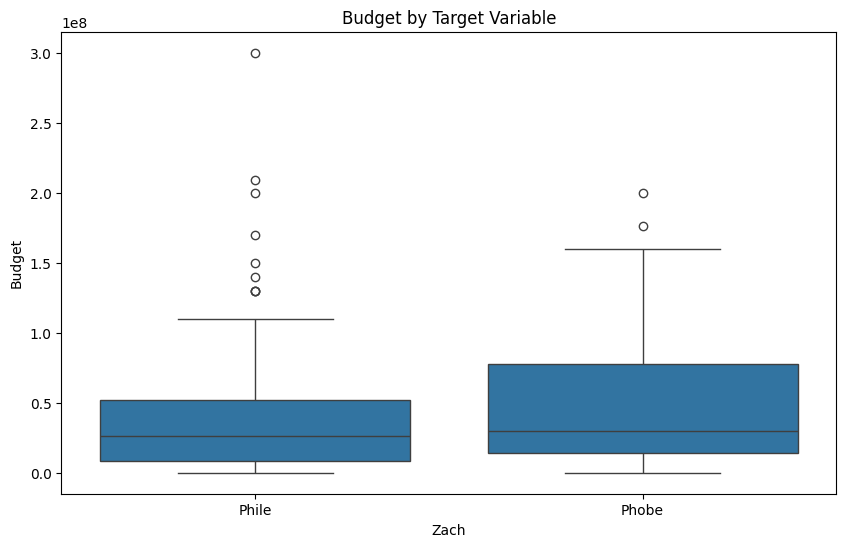

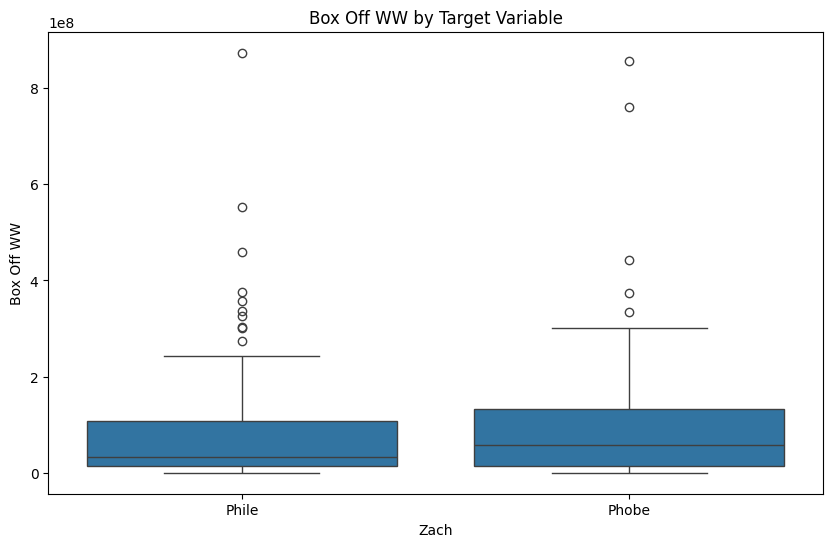

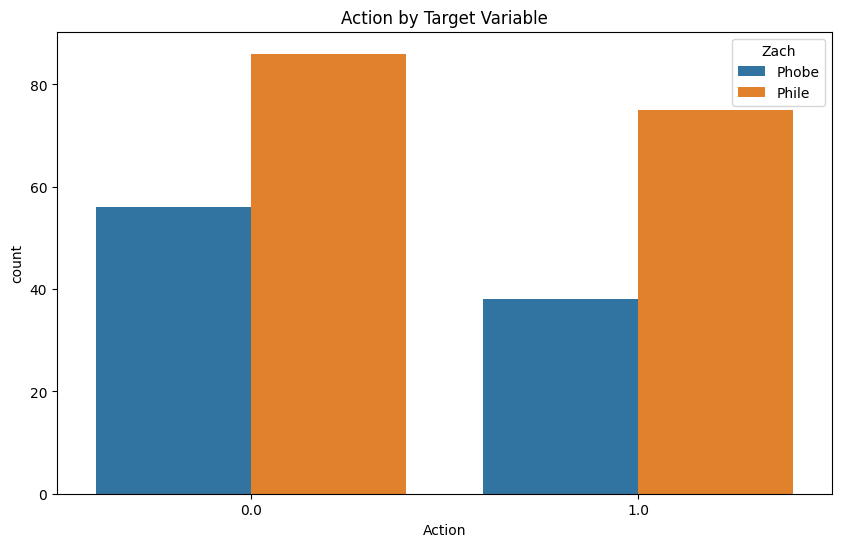

Zach   Action
Phile  0.0       86
       1.0       75
Phobe  0.0       56
       1.0       38
Name: count, dtype: int64


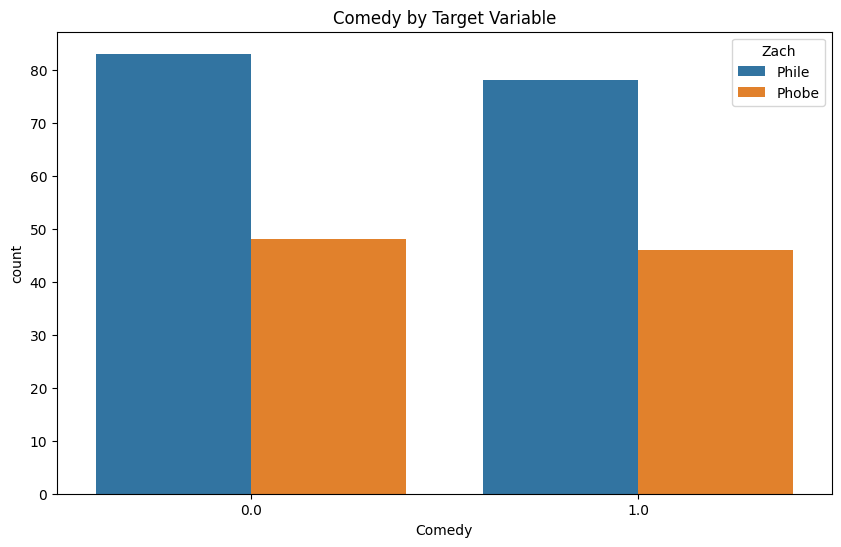

Zach   Comedy
Phile  0.0       83
       1.0       78
Phobe  0.0       48
       1.0       46
Name: count, dtype: int64


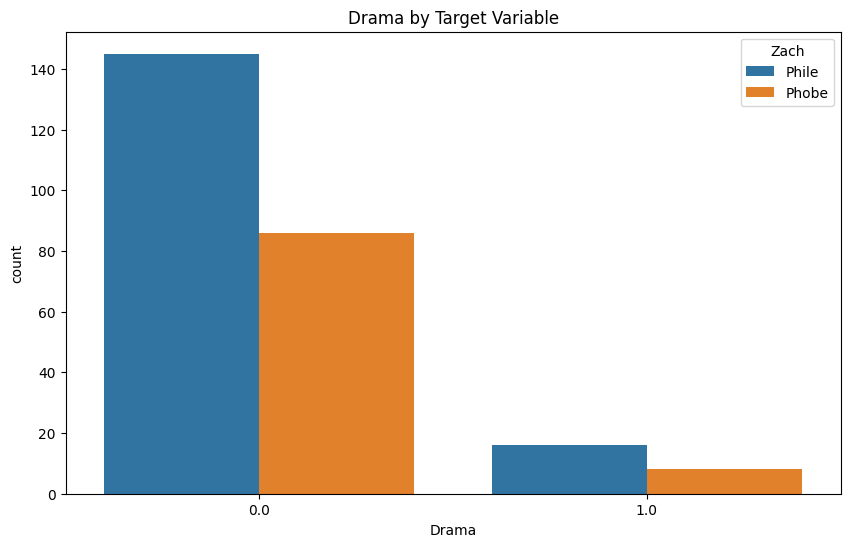

Zach   Drama
Phile  0.0      145
       1.0       16
Phobe  0.0       86
       1.0        8
Name: count, dtype: int64


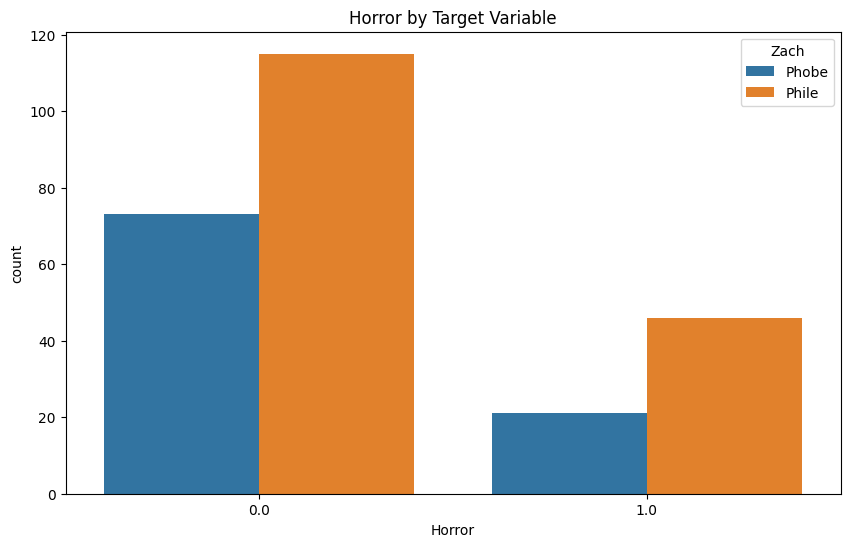

Zach   Horror
Phile  0.0       115
       1.0        46
Phobe  0.0        73
       1.0        21
Name: count, dtype: int64


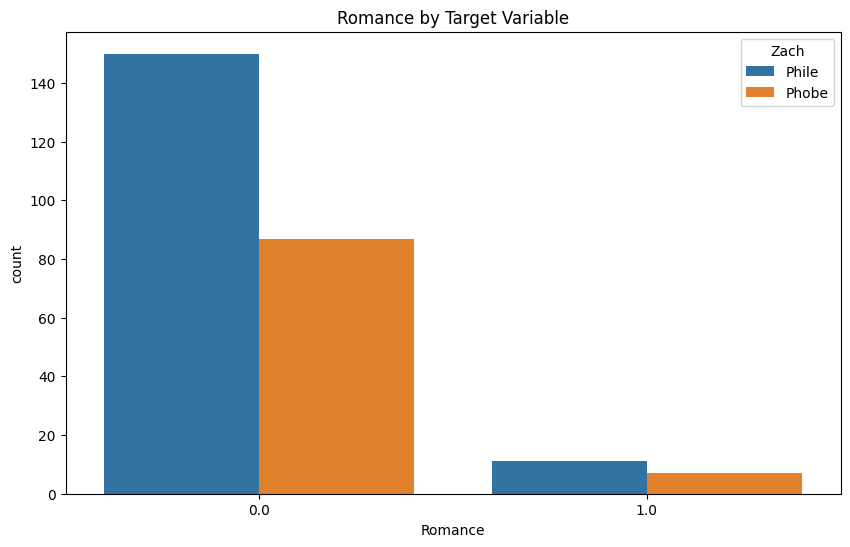

Zach   Romance
Phile  0.0        150
       1.0         11
Phobe  0.0         87
       1.0          7
Name: count, dtype: int64


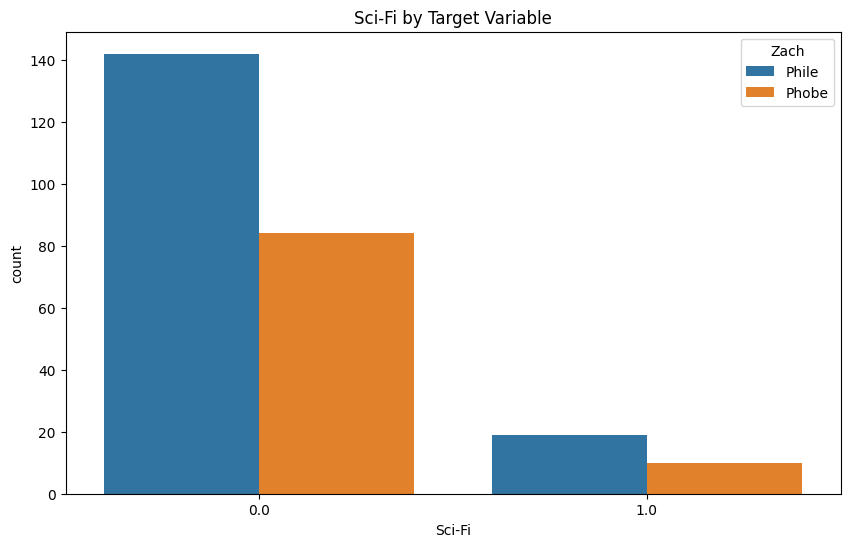

Zach   Sci-Fi
Phile  0.0       142
       1.0        19
Phobe  0.0        84
       1.0        10
Name: count, dtype: int64


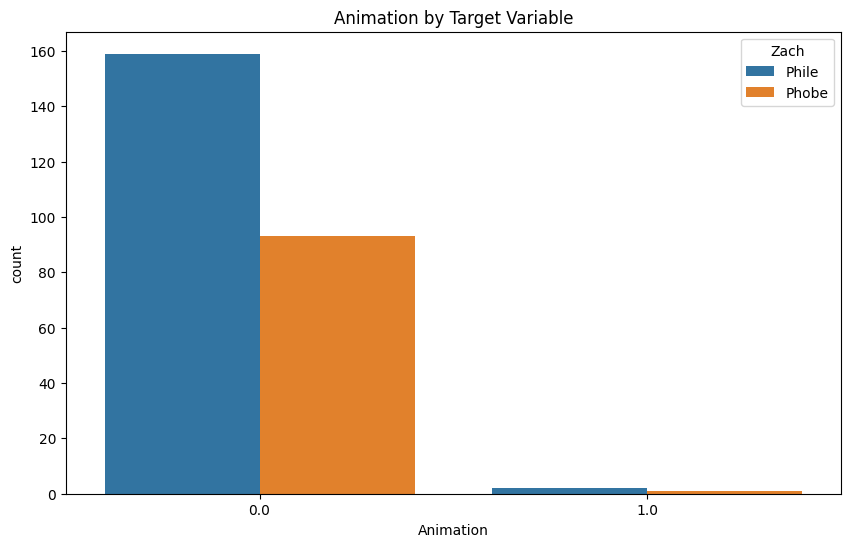

Zach   Animation
Phile  0.0          159
       1.0            2
Phobe  0.0           93
       1.0            1
Name: count, dtype: int64


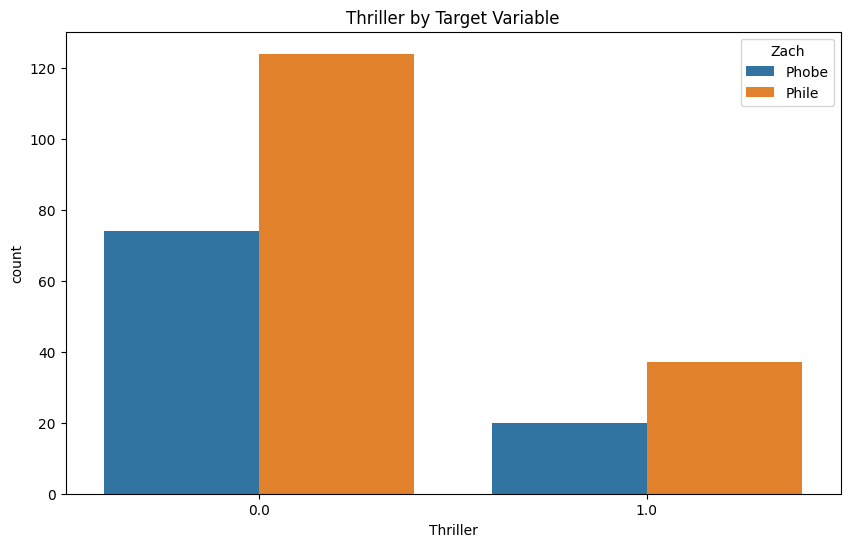

Zach   Thriller
Phile  0.0         124
       1.0          37
Phobe  0.0          74
       1.0          20
Name: count, dtype: int64


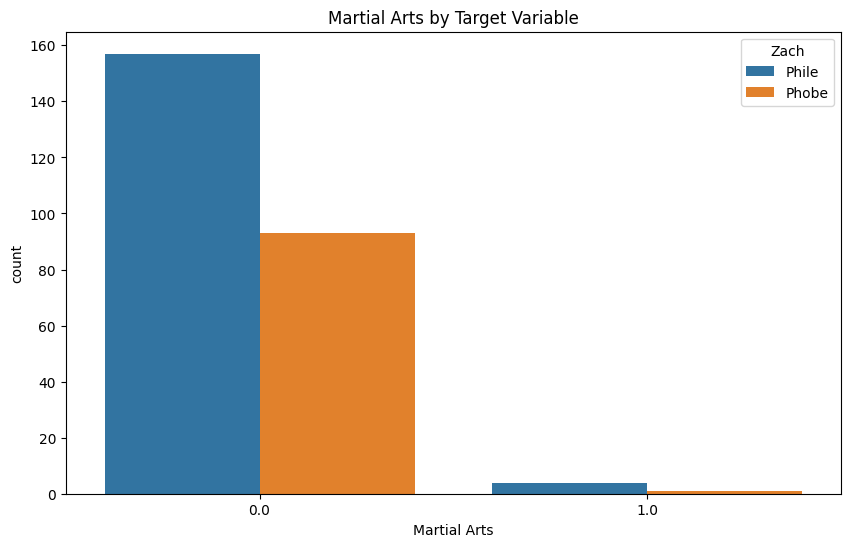

Zach   Martial Arts
Phile  0.0             157
       1.0               4
Phobe  0.0              93
       1.0               1
Name: count, dtype: int64


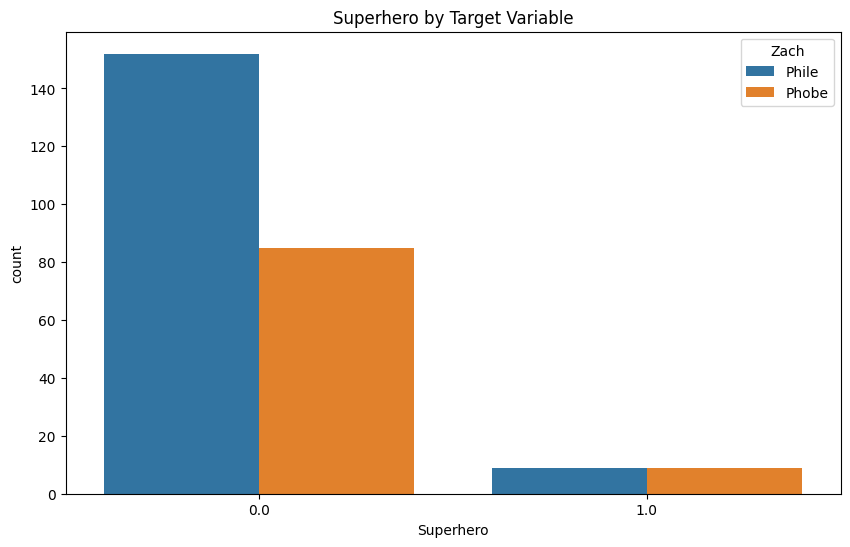

Zach   Superhero
Phile  0.0          152
       1.0            9
Phobe  0.0           85
       1.0            9
Name: count, dtype: int64


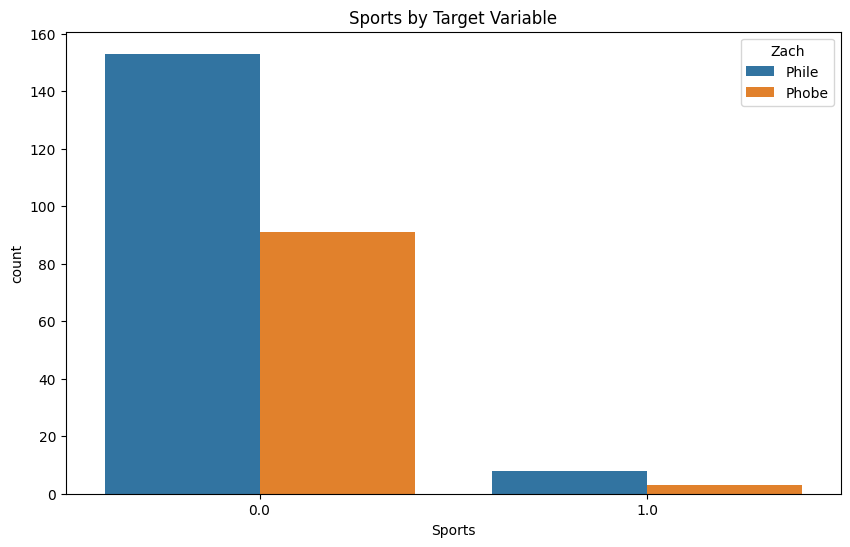

Zach   Sports
Phile  0.0       153
       1.0         8
Phobe  0.0        91
       1.0         3
Name: count, dtype: int64


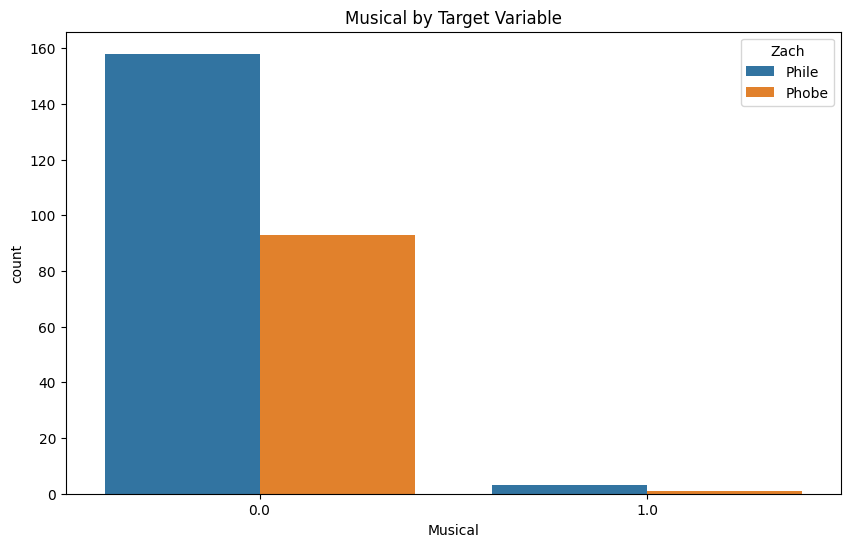

Zach   Musical
Phile  0.0        158
       1.0          3
Phobe  0.0         93
       1.0          1
Name: count, dtype: int64


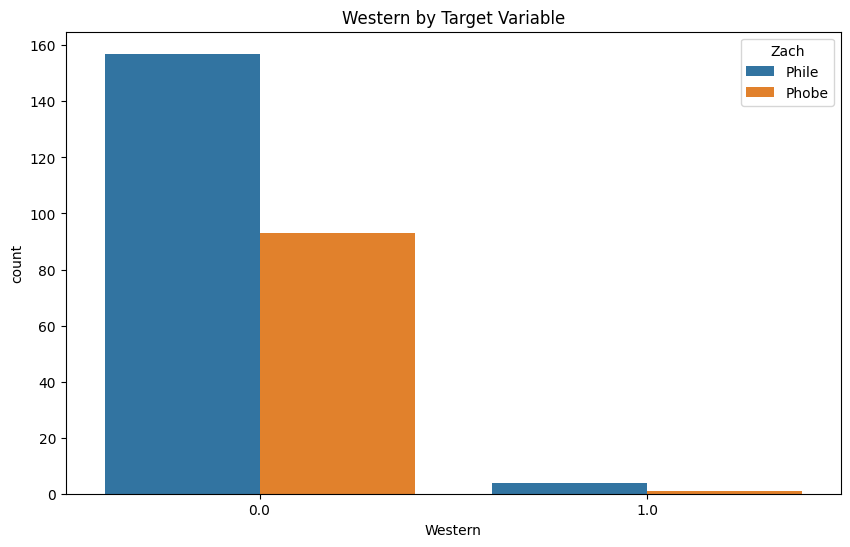

Zach   Western
Phile  0.0        157
       1.0          4
Phobe  0.0         93
       1.0          1
Name: count, dtype: int64


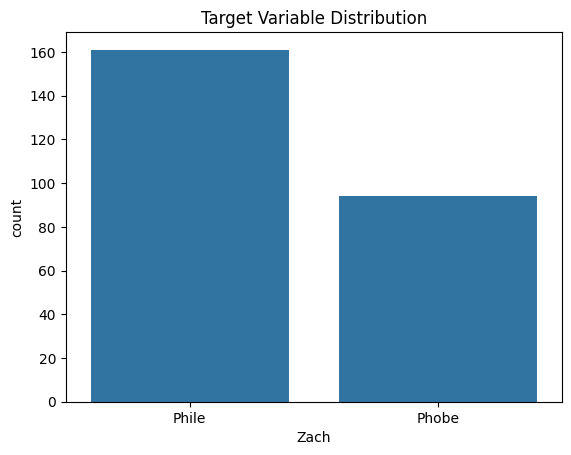

Zach
Phile    161
Phobe     94
Name: count, dtype: int64


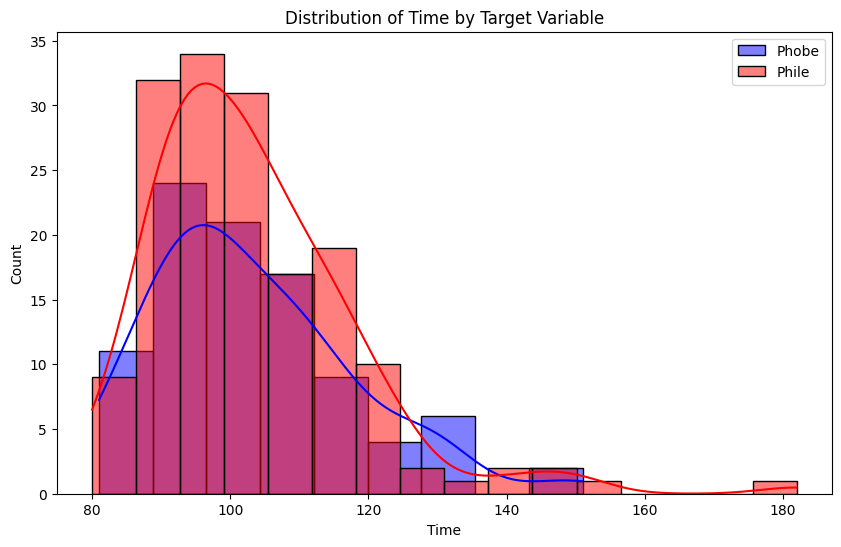

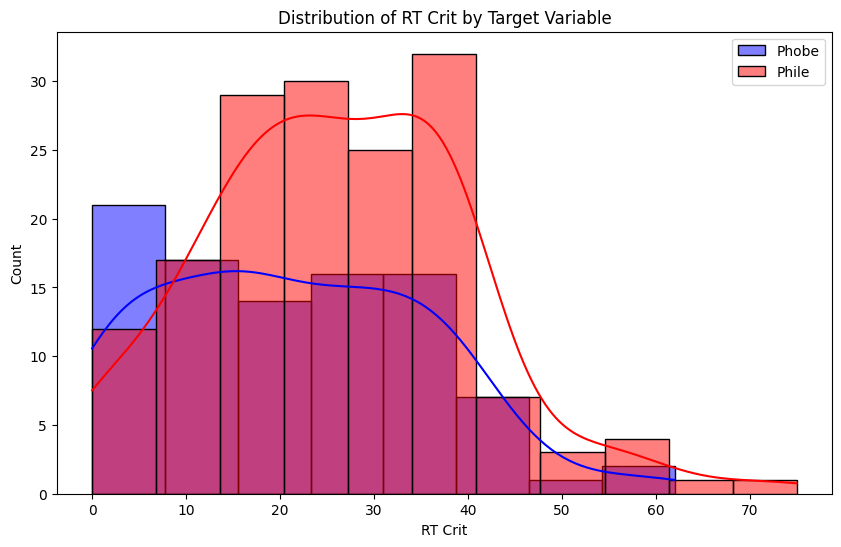

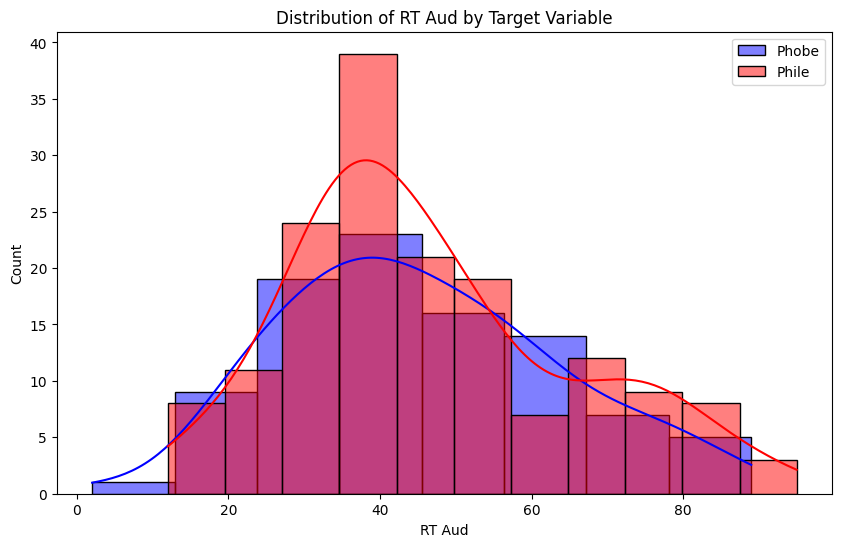

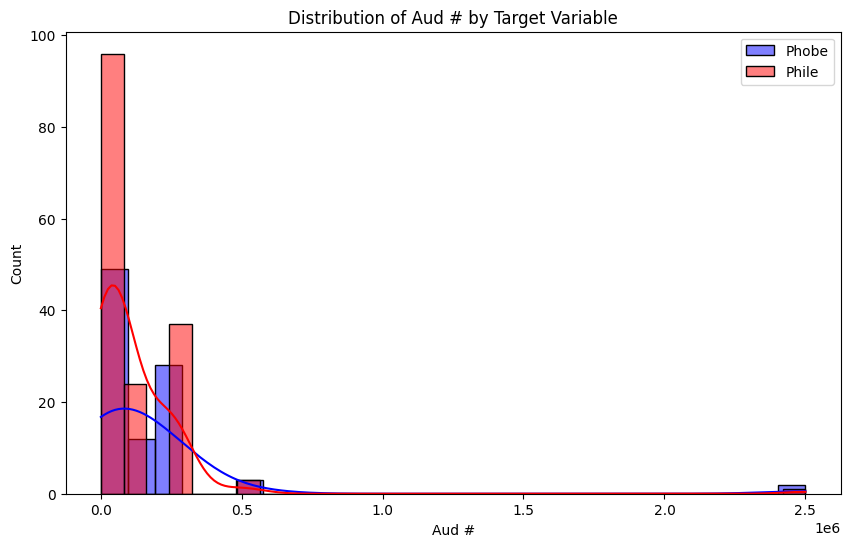

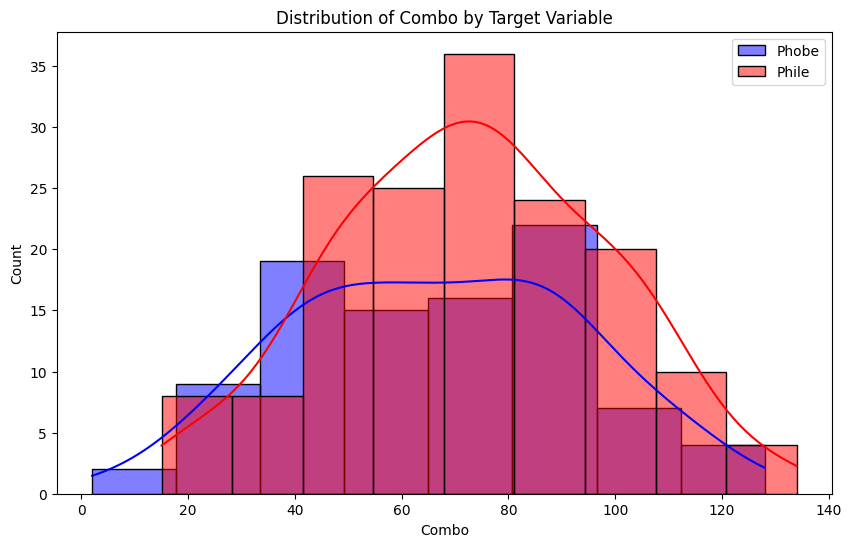

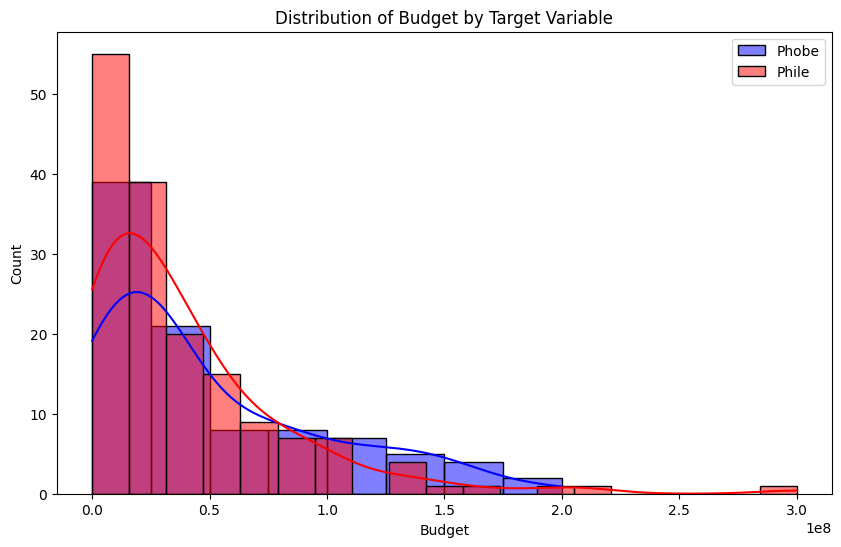

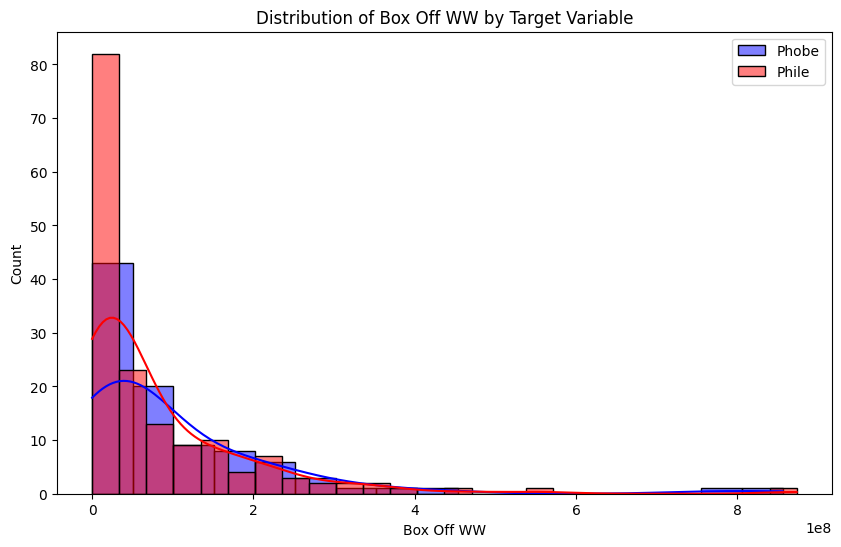

In [44]:
M.make_box_plot()
M.count_plots()
M.get_distribution()
M.make_histograms()

I ran code that created a logistic regression model for every possible combination of features. I have hardcoded these examples into the models below. It is likely that these models are overfitted to the training data. I belive it is likely that they would not maintiain this accuracy as more movies are added.

In [25]:
# run M
M.make_log_reg()
print(M.log_reg_results)

{'accuracy': 0.6274509803921569, 'confusion_matrix': [[31, 3], [16, 1]], 'y_pred': ['Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phobe', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phobe', 'Phobe', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phile', 'Phobe']}


In [ ]:
# run M1
M1.make_log_reg()
print(M1.log_reg_results)
print(M1.log_reg_results)

In [ ]:
# run M2
M2.make_log_reg()
print("______")
print(M2.log_reg_results)
print(M2.log_reg_results)

Running the same models on three different judges was an interesting experiment. With different random state splits of Training/Test data, I was able to consistently create models with 70-80% accuracy for Zach and Mayes using feature selection, K best or RFE, and Logistic Regression. Amin's tastes were a bit harder to predict. He's also the only person that reviewed  more of his own film selections negatively. Zach's taste also corresponds most with the Critics score from Rotten Tomatoes, including that feature alone, consistently gave accuracy scores > 65%.

Mayes' tastes are the most negative. He overwhelmingly assigns negative reviews to the other judges selections. He randomly has an affinity for Martial Arts films though.

Amin's tastes are also seemingly the most contrarian. The combined rotten tomatoes critics and audience score has a much weaker correlation to positive reviews for Amin, than it does for the other judges.

Zach is in general the most positive reviewer. He is four times less likely to give a negative review to one of Amin's movies than Mayes is, for example. Zach gives almost 5 positive reviews for each 1 negative review of Amin's movies. 

My conclusion is that the best Models for each judge are as follows:

Zach: Logistic Regression with feature selection using RFE, 10 features. Accuracy score of 72.5%
Amin: Logistic Regression with feature selection using Random Forrest, 14 features. Accuracy score of 66.7%
Mayes: Logistic Regression with feature selection using RFE, 6 features. Accuracy score of 80.4%